Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online 
application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History 
and others. To automate this process, they have given a problem to identify the customers’ segments, those are eligible for loan 
amount so that they can specifically target these customers. Here they have provided a partial data set.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv('F:\\Downloads\\CreditRisk.csv')

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


In [7]:
df.shape

(614, 13)

In [6]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount             int64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

In [26]:
def data(df1):
    return 'data size', df1.shape, 'data types ',df1.dtypes, 'data unique  ',df.nunique(), 'null val',df.isnull().sum(), df.describe()
    

In [27]:
data(df)

('data size',
 (614, 13),
 'data types ',
 Loan_ID               object
 Gender                object
 Married               object
 Dependents            object
 Education             object
 Self_Employed         object
 ApplicantIncome        int64
 CoapplicantIncome    float64
 LoanAmount             int64
 Loan_Amount_Term     float64
 Credit_History       float64
 Property_Area         object
 Loan_Status            int64
 dtype: object,
 'data unique  ',
 Loan_ID              614
 Gender                 2
 Married                2
 Dependents             4
 Education              2
 Self_Employed          2
 ApplicantIncome      505
 CoapplicantIncome    287
 LoanAmount           204
 Loan_Amount_Term      10
 Credit_History         2
 Property_Area          3
 Loan_Status            2
 dtype: int64,
 'null val',
 Loan_ID               0
 Gender               13
 Married               3
 Dependents           15
 Education             0
 Self_Employed        32
 ApplicantIncome  

In [28]:
df['Loan_Amount_Term'].nunique()

10

In [138]:
def chenge_data_type(df1,col):
    if df1[col].dtype !='object':
        df1[col]=df1[col].astype('object')

In [146]:
chenge_data_type(df,'Credit_History')

In [147]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount             int64
Loan_Amount_Term     float64
Credit_History        object
Property_Area         object
Loan_Status            int64
dtype: object

In [141]:
def null_per(df1):
    per=(df1.isnull().sum()/df1.isnull().count())*100
    print(per)
    for i in df1:
        if (df1[i].isnull().sum()/df1[i].isnull().count())*100 >30:
            df1[i]=df1[i].dropna()
        else:    
            if df1[i].dtypes=='object':
                df1[i]=df1[i].fillna(df1[i].mode().iloc[0])
            else:
                df1[i]=df1[i].fillna(df1[i].mean())

In [142]:
null_per(df)
df.isnull().sum()

Loan_ID              0.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [151]:
num_col=df.select_dtypes(include=np.number)
cat_col=df.select_dtypes(exclude=np.number)


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


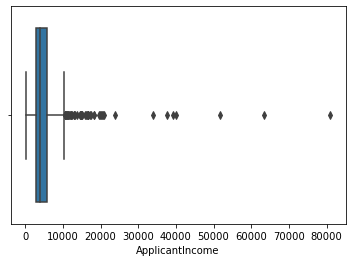

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


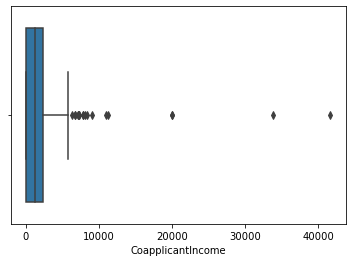

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


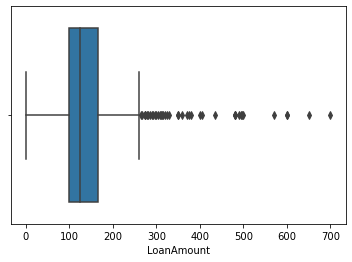

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


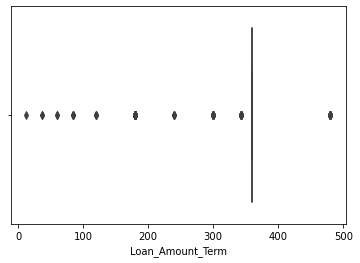

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


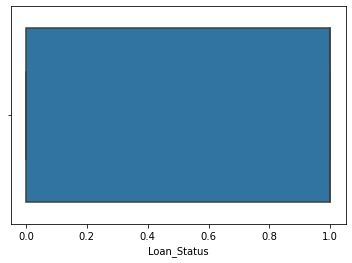

In [158]:
for i in num_col:
    sns.boxplot(num_col[i])
    plt.show()

In [153]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount             int64
Loan_Amount_Term     float64
Credit_History        object
Property_Area         object
Loan_Status            int64
dtype: object

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


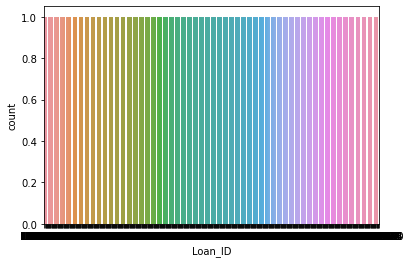

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


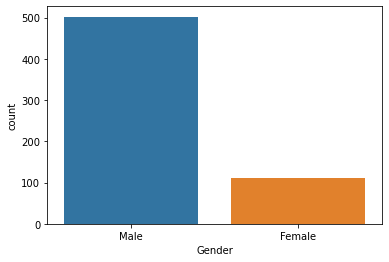

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


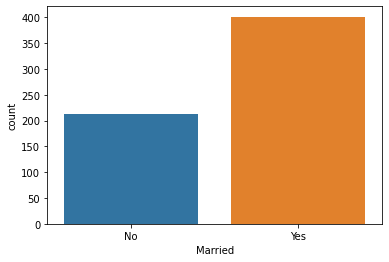

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


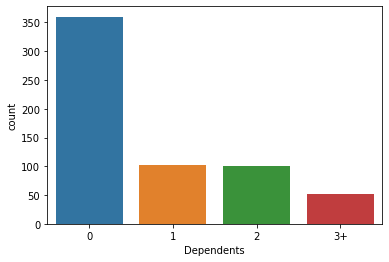

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


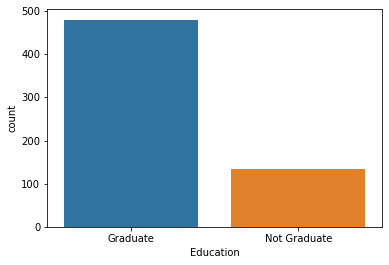

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


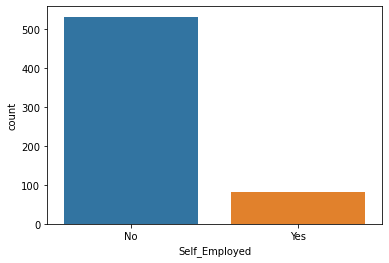

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


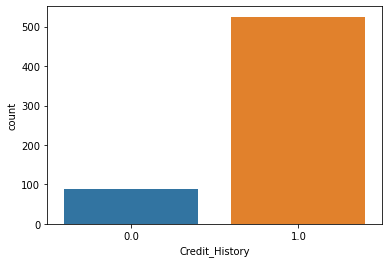

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


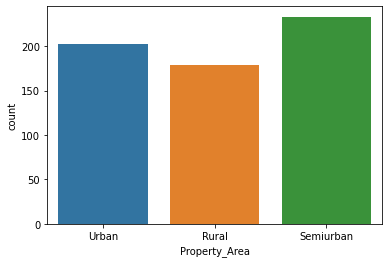

In [162]:
for i in cat_col.columns:
    sns.countplot(cat_col[i])
    plt.show()

In [163]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [185]:
#df.drop('Loan_ID',axis=1,inplace=True)

In [175]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

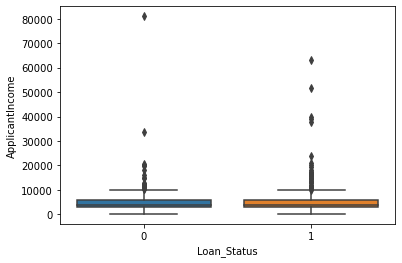

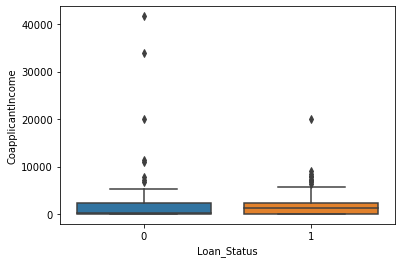

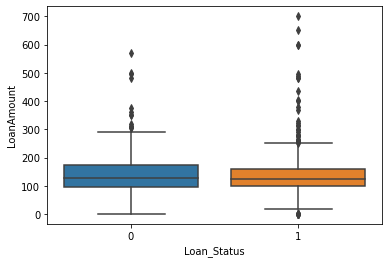

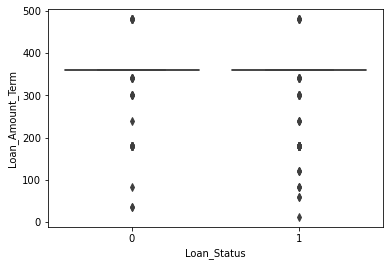

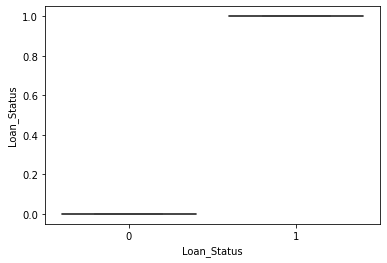

In [170]:
for i in num_col.columns:
    sns.boxplot(y=num_col[i],x=df['Loan_Status'])
    plt.show()

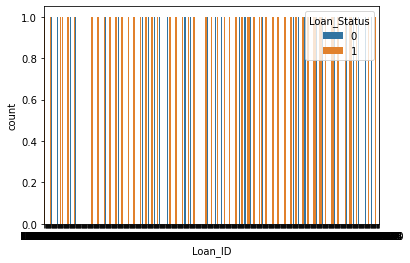

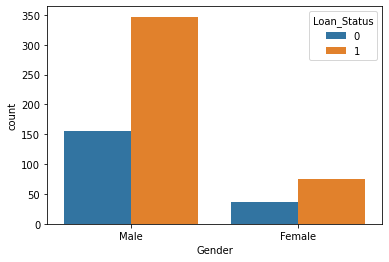

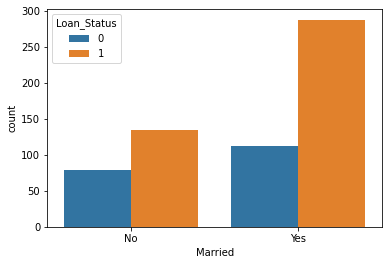

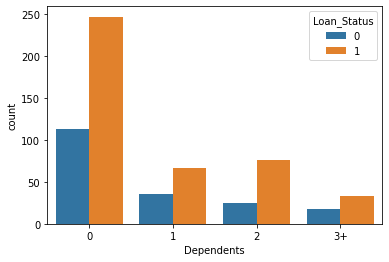

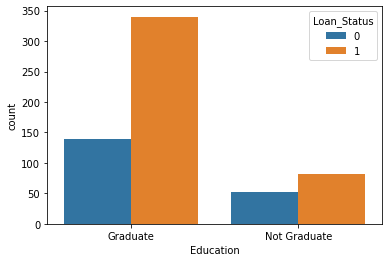

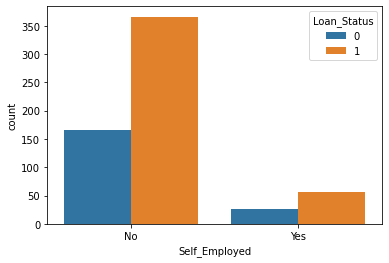

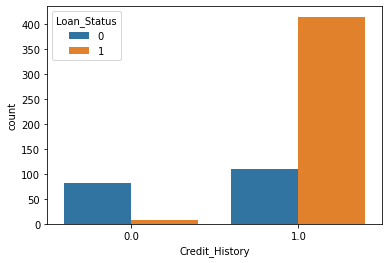

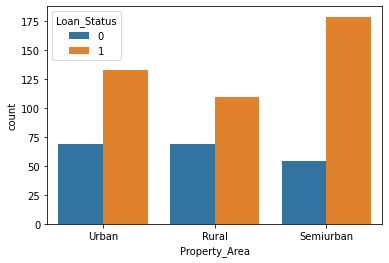

In [173]:
for i in cat_col.columns:
    sns.countplot(x=cat_col[i],hue=df['Loan_Status'])
    plt.show()

In [176]:
from scipy.stats import ttest_ind,shapiro,mannwhitneyu

In [235]:
shapiro(df['ApplicantIncome'])

ShapiroResult(statistic=0.47126346826553345, pvalue=4.8126138406832944e-39)

In [178]:
f=pd.crosstab(df['Gender'],df['Loan_Status'])
f

Loan_Status,0,1
Gender,,
Female,37,75
Male,155,347


In [179]:
loan_yes=df[df['Loan_Status']==1]
loan_no=df[df['Loan_Status']==0]

In [184]:
shapiro(loan_yes['ApplicantIncome'])

ShapiroResult(statistic=0.5054270029067993, pvalue=1.278204051346148e-32)

In [186]:
shapiro(loan_no['ApplicantIncome'])

ShapiroResult(statistic=0.4136806130409241, pvalue=1.1565562701078987e-24)

In [188]:
mannwhitneyu(loan_yes['ApplicantIncome'],loan_no['ApplicantIncome']) #More roboust test if data is not normal

MannwhitneyuResult(statistic=40302.0, pvalue=0.459057140289925)

In [190]:
ttest_ind(loan_yes['ApplicantIncome'],loan_no['ApplicantIncome'])

Ttest_indResult(statistic=-0.11650844828724542, pvalue=0.907287812130518)

In [196]:
num=df.select_dtypes(include=np.number)
num.drop('Loan_Status',axis=True,inplace =True)
num

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849,0.0,0,360.0
1,4583,1508.0,128,360.0
2,3000,0.0,66,360.0
3,2583,2358.0,120,360.0
4,6000,0.0,141,360.0
...,...,...,...,...
609,2900,0.0,71,360.0
610,4106,0.0,40,180.0
611,8072,240.0,253,360.0
612,7583,0.0,187,360.0


In [220]:
for i in num:
    a=mannwhitneyu(loan_yes[i],loan_no[i])
    print(a[1])
    if a[1]<0.05:
        print('signi')
    else:
        print('not signi')


0.459057140289925
not signi
0.19343675495401091
not signi
0.4289158795456949
not signi
0.3854363187181357
not signi


In [219]:
for i in num:
    a=ttest_ind(loan_yes[i],loan_no[i])
    print(a[1])
    if a[1]<0.05:
        print('signi')
    else:
        print('not signi')


0.907287812130518
not signi
0.14294828684286368
not signi
0.7926335457845242
not signi
0.6039634092406272
not signi


In [209]:
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chisquare,chi2_contingency

In [223]:
ct=pd.crosstab(df['Loan_Status'],df['Gender'])
ct


Gender,Female,Male
Loan_Status,,
0,37,155
1,75,347


In [217]:
for i in cat_col:
    ct=pd.crosstab(cat_col[i],df['Loan_Status'])
    a=chi2_contingency(ct)
    print(i,a)
    if a[1]<0.05:
        print('signi')
    else:
        print('not signi')
    

Gender (0.11087854691241235, 0.7391461310869638, 1, array([[ 35.0228013,  76.9771987],
       [156.9771987, 345.0228013]]))
not signi
Married (4.73187557933362, 0.029608580862582116, 1, array([[ 66.60586319, 146.39413681],
       [125.39413681, 275.60586319]]))
signi
Dependents (3.1513990012324227, 0.3688663081366005, 3, array([[112.5732899 , 247.4267101 ],
       [ 31.89576547,  70.10423453],
       [ 31.58306189,  69.41693811],
       [ 15.94788274,  35.05211726]]))
not signi
Education (4.091490413303621, 0.04309962129357355, 1, array([[150.09771987, 329.90228013],
       [ 41.90228013,  92.09771987]]))
signi
Self_Employed (0.0013148242700656973, 0.9710746411403309, 1, array([[166.35830619, 365.64169381],
       [ 25.64169381,  56.35830619]]))
not signi
Credit_History (176.1145746235241, 3.4183499979091188e-40, 1, array([[ 27.83061889,  61.16938111],
       [164.16938111, 360.83061889]]))
signi
Property_Area (12.297623130485675, 0.0021360187811644937, 2, array([[ 55.97394137, 123.026

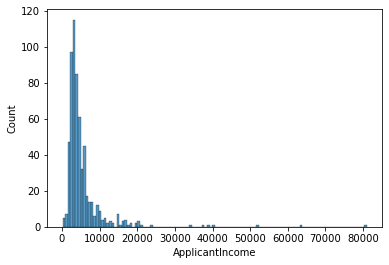

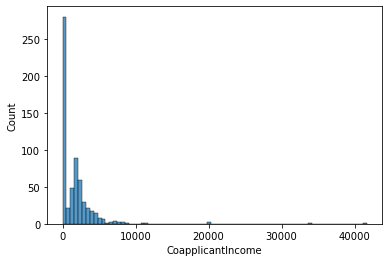

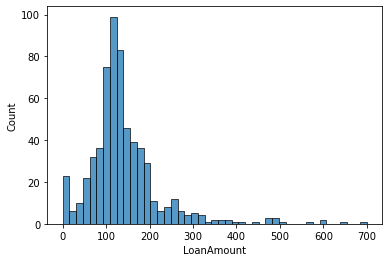

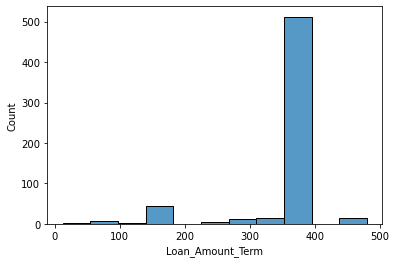

In [240]:
for i in num:
    sns.histplot(num[i])
    plt.show()

In [317]:
# outliers treatmen
def out(df1):
    for i in df1:
        if df1[i].dtypes!='object':
            q1=df1[i].quantile(0.25)
            q3=df1[i].quantile(0.75)
            iqr=q3-q1
            ll=q1-1.5*iqr
            ul=q3+1.5*iqr
            df1.drop(df1[df1[i]>ul].index,inplace=True)
            df1.drop(df1[df1[i]<ll].index,inplace=True)

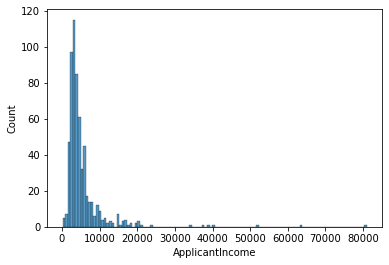

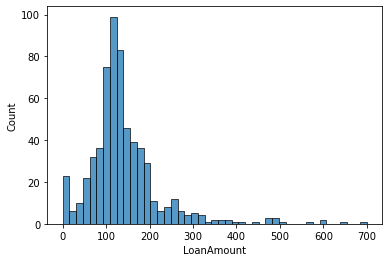

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

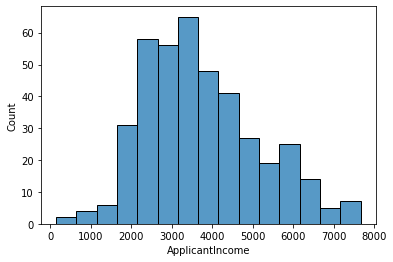

In [319]:
out(df3)
sns.histplot(df3['ApplicantIncome'])

In [320]:
# with outliers
df_dummy=pd.get_dummies(df,drop_first=True)

In [321]:
df_dummy.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,0,360.0,1,1,0,0,0,0,0,0,1,0,1
1,4583,1508.0,128,360.0,0,1,1,1,0,0,0,0,1,0,0
2,3000,0.0,66,360.0,1,1,1,0,0,0,0,1,1,0,1
3,2583,2358.0,120,360.0,1,1,1,0,0,0,1,0,1,0,1
4,6000,0.0,141,360.0,1,1,0,0,0,0,0,0,1,0,1


In [323]:
x=df_dummy.drop('Loan_Status',axis=1)
y=df_dummy['Loan_Status']

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_sc=sc.fit_transform(x)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_sc,y, random_state=0,test_size=0.3)

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()

LR.fit(x_train,y_train)
from sklearn import model_selection
from sklearn import metrics

y_pred=LR.predict(x_test)
print(y_test.value_counts())

acc=metrics.accuracy_score(y_test,y_pred)
print(acc)

cm=metrics.confusion_matrix(y_test,y_pred)
print(cm)

1    134
0     51
Name: Loan_Status, dtype: int64
0.8324324324324325
[[ 22  29]
 [  2 132]]


In [324]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [326]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print(y_test.value_counts())

acc=metrics.accuracy_score(y_test,y_pred)
print(acc)

cm=metrics.confusion_matrix(y_test,y_pred)
print(cm)

1    134
0     51
Name: Loan_Status, dtype: int64
0.8054054054054054
[[ 23  28]
 [  8 126]]


In [327]:
GB=GaussianNB()
GB.fit(x_train,y_train)
y_pred=GB.predict(x_test)
print(y_test.value_counts())

acc=metrics.accuracy_score(y_test,y_pred)
print(acc)

cm=metrics.confusion_matrix(y_test,y_pred)
print(cm)

1    134
0     51
Name: Loan_Status, dtype: int64
0.8216216216216217
[[ 22  29]
 [  4 130]]


In [328]:
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
y_pred=DT.predict(x_test)
print(y_test.value_counts())

acc=metrics.accuracy_score(y_test,y_pred)
print(acc)

cm=metrics.confusion_matrix(y_test,y_pred)
print(cm)

1    134
0     51
Name: Loan_Status, dtype: int64
0.7243243243243244
[[ 29  22]
 [ 29 105]]


In [329]:
RF=RandomForestClassifier()
RF.fit(x_train,y_train)
y_pred=RF.predict(x_test)
print(y_test.value_counts())

acc=metrics.accuracy_score(y_test,y_pred)
print(acc)

cm=metrics.confusion_matrix(y_test,y_pred)
print(cm)

1    134
0     51
Name: Loan_Status, dtype: int64
0.7783783783783784
[[ 24  27]
 [ 14 120]]


In [330]:
from sklearn.model_selection import cross_val_score,KFold
kf=KFold(shuffle=True,n_splits=3,random_state=0)
cv=cross_val_score(LR,x_sc,y, cv=kf)
print(np.mean(1-cv),np.std(cv,ddof=1))
print(np.mean(cv))

0.18572453371592543 0.031066828379893788
0.8142754662840747


In [331]:
from sklearn.model_selection import cross_val_score,KFold
kf=KFold(shuffle=True,n_splits=3,random_state=0)
cv=cross_val_score(knn,x_sc,y, cv=kf)
print(np.mean(1-cv),np.std(cv,ddof=1))
print(np.mean(cv))

0.23291088793240874 0.025193044636865745
0.7670891120675912


In [332]:
from sklearn.model_selection import cross_val_score,KFold
kf=KFold(shuffle=True,n_splits=3,random_state=0)
cv=cross_val_score(GB,x_sc,y, cv=kf)
print(np.mean(1-cv),np.std(cv,ddof=1))
print(np.mean(cv))

0.19874063446516818 0.023673817706089152
0.8012593655348318


In [333]:
from sklearn.model_selection import cross_val_score,KFold
kf=KFold(shuffle=True,n_splits=3,random_state=0)
cv=cross_val_score(DT,x_sc,y, cv=kf)
print(np.mean(1-cv),np.std(cv,ddof=1))
print(np.mean(cv))

0.26877092300334765 0.03104349131993539
0.7312290769966524


In [334]:
from sklearn.model_selection import cross_val_score,KFold
kf=KFold(shuffle=True,n_splits=3,random_state=0)
cv=cross_val_score(RF,x_sc,y, cv=kf)
print(np.mean(1-cv),np.std(cv,ddof=1))
print(np.mean(cv))

0.22317073170731705 0.025199973560697368
0.776829268292683


In [335]:
# with outliers treatment
def out(df1):
    for i in df1:
        if df1[i].dtypes!='object':
            q1=df1[i].quantile(0.25)
            q3=df1[i].quantile(0.75)
            iqr=q3-q1
            ll=q1-1.5*iqr
            ul=q3+1.5*iqr
            df1.drop(df1[df1[i]>ul].index,inplace=True)
            df1.drop(df1[df1[i]<ll].index,inplace=True)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

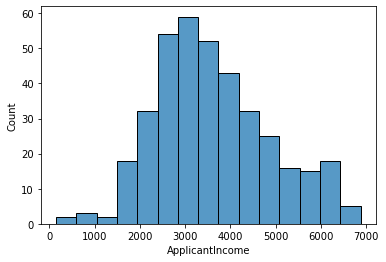

In [344]:
out(df)
df.head()
df_dummy=pd.get_dummies(df,drop_first=True)
sns.histplot(df_dummy['ApplicantIncome'])

In [345]:
x=df_dummy.drop('Loan_Status',axis=1)
y=df_dummy['Loan_Status']

from sklearn.preprocessing import PowerTransformer
sc=PowerTransformer()
x_sc=sc.fit_transform(x)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_sc,y, random_state=0,test_size=0.3)

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()

LR.fit(x_train,y_train)
from sklearn import model_selection
from sklearn import metrics

y_pred=LR.predict(x_test)
print(y_test.value_counts())

acc=metrics.accuracy_score(y_test,y_pred)
print(acc)

cm=metrics.confusion_matrix(y_test,y_pred)
print(cm)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2995: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


1    76
0    37
Name: Loan_Status, dtype: int64
0.7964601769911505
[[16 21]
 [ 2 74]]
